In [1]:
from src.OPFInterface import OPFClassifier
from functools import cmp_to_key
import pandas as pd
import numpy as np
from os import listdir
from src.utils import error, read_df, euclidean_distance_classify
from tqdm import tqdm
# plot
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

/mnt/c/Users/AndreFakhoury/Documents/GitHub/time-series-opf/venv/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/c/Users/AndreFakhoury/Documents/GitHub/time-series-opf/venv/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/c/Users/AndreFakhoury/Documents/GitHub/time-series-opf/venv/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/c/Users/AndreFakhoury/Documents/GitHub/time-series-opf/venv/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type 

In [2]:
def analyse(df_name):
    X, y, X_test, y_test, df_errors = read_df(df_name)
    opf = OPFClassifier('euclidean-distance')
    opf.fit(X, y)
    preds = opf.classify(X_test)
    return error(preds, y_test), df_errors['ED']

In [3]:
def get_val(df_name):
    datasets_df = pd.read_csv('data/DataSummary.csv')
    df_a = datasets_df.loc[datasets_df['Name'] == df_name].iloc[:,[3,6]]
    return df_a.values[0][0] * df_a.values[0][1]

df_names = listdir('data/UCRArchive_2018')
df_values = [(get_val(df_name), df_name) for df_name in df_names]

df_values.sort()
df_names = [df_name for val, df_name in df_values]

In [4]:
opf_scores = []
for df_name in tqdm(df_names):
    opf_error, nn_error = analyse(df_name)
    opf_scores.append((df_name, opf_error, nn_error))

100%|█████████████████████████████████████████████████████████████████████████████████| 128/128 [01:23<00:00,  1.54it/s]


In [5]:
opf_scores.sort(key=lambda x: x[1]-x[2])
print(len(opf_scores))
df_best = [x for x in opf_scores if x[1]-1e-3 <= x[2]]
print(len(df_best))

128
64


SemgHandSubjectCh2
InsectEPGSmallTrain
InsectEPGRegularTrain
SemgHandMovementCh2
PigArtPressure
PLAID
SemgHandGenderCh2
MelbournePedestrian
GunPointAgeSpan


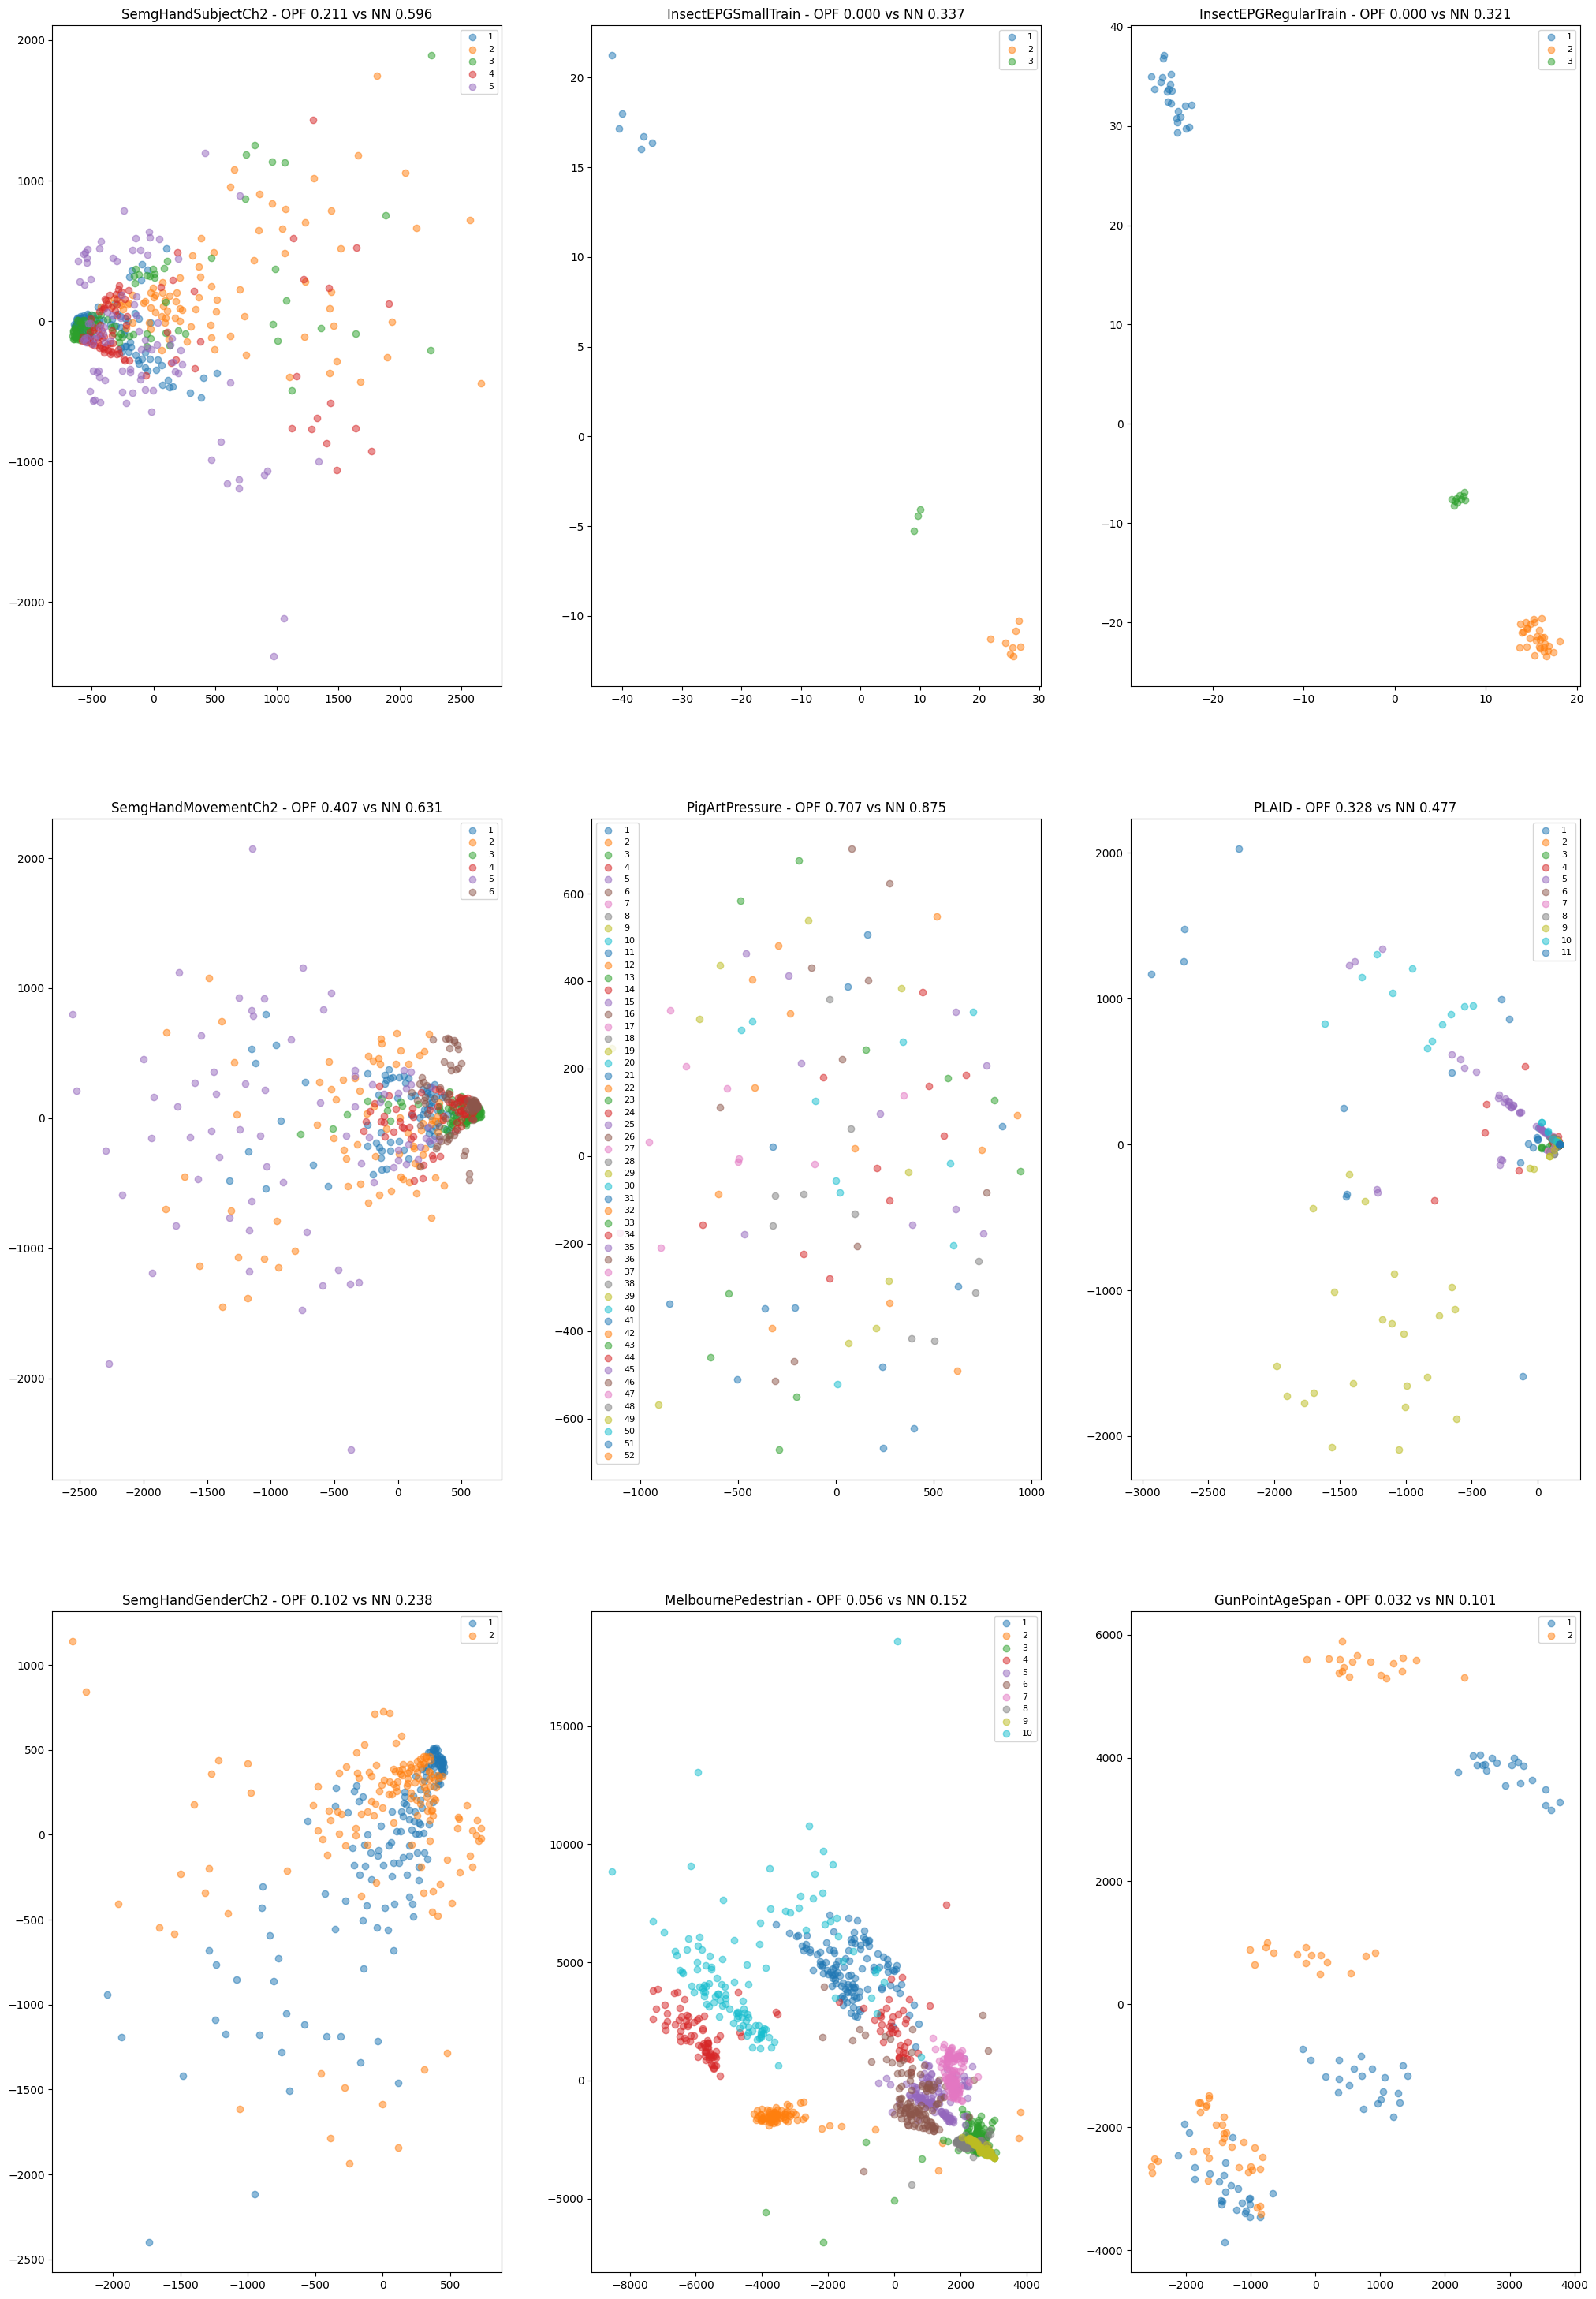

In [6]:
df_best_to_plot = df_best[:9]

fig, axes = plt.subplots((len(df_best_to_plot)+2)//3, 3, figsize=(25, 37))

def scatter_points(df_name, opf_error, nn_error, ax):
    X, y, X_test, y_test, df_errors = read_df(df_name)
    embedding = MDS(n_components=2)
    X_t = embedding.fit_transform(X)

    for cur_y in np.unique(y):
        ax.scatter(X_t[y==cur_y,0], X_t[y==cur_y,1], alpha=0.5)
    ax.legend(np.unique(y), fontsize=8, title_fontsize=8)
    ax.title.set_text("%s - OPF %.3f vs NN %.3f" % (df_name, opf_error, nn_error))
    
for idx, df_info in enumerate(df_best_to_plot):
    df_name, opf_error, nn_error = df_info
    print(df_name)
    scatter_points(df_name, opf_error, nn_error, axes.flatten()[idx])

plt.savefig('scatter.pdf')
plt.show()

In [7]:
from src.py_opf import OptimumPathForestClassifier
X, y, X_test, y_test, df_errors = read_df("SemgHandSubjectCh2")
opf = OptimumPathForestClassifier('euclidean-distance')
opf.fit(X, y)
preds = opf.classify(X_test)
error(preds, y_test), df_errors

(0.2111111111111111, {'ED': 0.5956, 'DTW': '0.2000 (3)', 'DTW_W100': 0.2733})